# Linking discretized RgL plane with conformations of IDPs

When bound to its partner, the protein PUMA behaves as a structured protein, presenting an alpha-helical structure. However, in isolatation, PUMA does not seem to have a well defined structure, i.e., it behaves as an intrinsically disordered protein (IDP). The isolated PUMA protein (residues 128-161 from Uniprot Q99ML1) is then used to investigate how the hubs in the discretized RgL plane relate (or not) to the possible IDP conformations. We want to investigate the energy characteristics of the most occupied hubs and typical conformations of different energy ranges.

## Building network diagram

First, we build the RgL network parameters of PUMA and list of energies for conformations assigned to the four most occupied bins:

In [1]:
from RgL2 import RgL

path='/home/belisa/Documents/PUMA_ext/3.2-wocmap/'

sysRgL=RgL(path+'outtime_0.35_en.txt', lim=1000001, idx=3, dt=20, nhubs=4, energy=True, contacts=True, 
           compute_energy=True, compute_contacts=True)

Calculating binning parameters.
xmin =7, xmax=30, len_xbin=1.0361831039142766
ymin =4, ymax=96, len_ybin=9.392794930265122
Setting selHubIDs = np.arange(0,nhubs).
Hubs: [(3, 2), (4, 2), (4, 3), (3, 3)]


Then we save the network parameters in output files and generate the network graph:

Generating output files:
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_occupancy_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_bins_dt20_tp0.35.txt
/home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_transitions_dt20_tp0.35.txt
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.eps
Drawing /home/belisa/Documents/PUMA_ext/3.2-wocmap/PUMA_graph_dt20_tp0.35_finfo_0.05_0.8.png


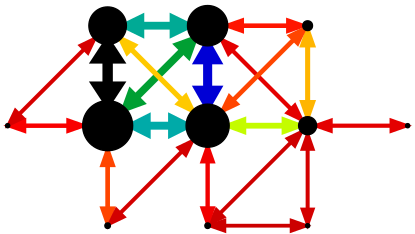

In [2]:
import ManageFile as mf
import GraphNetwork as gn
from IPython.display import Image

propname = ['occupancy', 'bins', 'transitions']
outname = [mf.set_output_name('PUMA', p, dt=20, tp=0.35, nhubs=4) for p in propname]
sysRgL.prop_to_file(propname, outname)
[occ_file, bins_file, trans_file] = outname
nwRgL = gn.graph(occ_file, trans_file, shift_color=0.8,
                 splines=True, ffac=0.05, facbothdir=0.8)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='eps', 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname)
graphname = mf.set_output_name('PUMA', 'graph', dt=20, tp=0.35, fmt='png', 
                               finfo=True, ffac=0.05, facbothdir=0.8, nhubs=4)
nwRgL.draw_graph(graphname, fmt='png')
Image(graphname)

The network has four hubs (most occupied bins). Now we put axes and identify the hubs from 1 to 4, where 1 is the most occupied hub:

![](PUMA_network.png)

 ## Energy distribution of the hubs in the network
 
 The hubs have the corresponding energy distributions (median energies indicated by dotted lines):

Median energy value for hub 1:-61.4025
Minimum energy value for hub 1:-92.241
Maximum energy value for hub 1:-20.472
Median energy value for hub 2:-58.095
Minimum energy value for hub 2:-88.8615
Maximum energy value for hub 2:-9.2925
Median energy value for hub 3:-58.506
Minimum energy value for hub 3:-87.27
Maximum energy value for hub 3:518.2575
Median energy value for hub 4:-61.3185
Minimum energy value for hub 4:-91.752
Maximum energy value for hub 4:-19.305


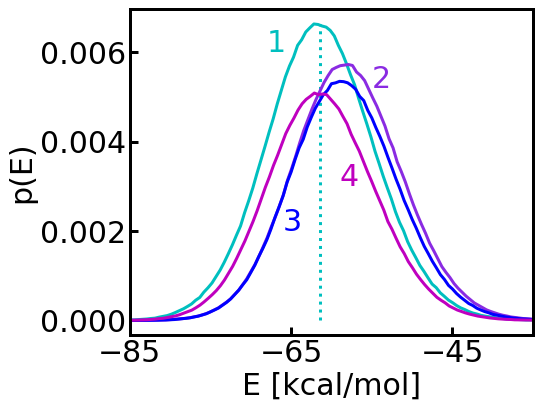

In [5]:
import numpy as np
import set_figure3 as setfig

def distribution(x, weights, bsize):
    xlen = max(x)-min(x)
    nbins = int(xlen/bsize)
    edges = np.linspace(min(x),max(x),nbins)
    H, edges = np.histogram(x, bins=edges, weights=weights)
    
    centers = np.array(edges) + bsize*0.5
    centers = centers[0:-1]
    listH = list(H.T)
    medx = np.median(x)
    
    return centers, listH, medx

medE_list = []
Emax = []

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2)
colors = ['c', 'blueviolet', 'b', 'm', 'r']

for i in range(sysRgL.nhubs): 
    color = colors[i]       
    
    E = [g for (a,b,c,d,e,f,g) in sysRgL.ConfHubList[i]]
    weights = np.ones_like(E)/(sysRgL.lim*sysRgL.ntraj/sysRgL.dt)
    centers, listH, medE = distribution(E, weights, bsize=0.5)
    medE_list.append(medE)
    minE = min(E)
    maxE = max(E)
    E = []
    
    if i == 0:
        maxH = max(listH)
        vline = np.arange(0, maxH+0.5*maxH/5, maxH/5)
        xline = [medE]*len(vline)    
        sbpl.plot(xline, vline, ':', linewidth=3, color=color)
        xtxt = -68
        ytxt = 0.006
    elif i == 1:
        xtxt = -55
        ytxt = 0.0052
    elif i == 2:
        xtxt = -66
        ytxt = 0.002
    elif i == 3:
        xtxt = -59
        ytxt = 0.003
    sbpl.text(xtxt,ytxt,str(i+1), color=color, fontsize=fntsize)
    sbpl.plot(centers, listH, linewidth=3, color=color)
    setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                          xmin=-85, xmax=-35, xstep_tick=20,
                          xlabel=r'E [kcal/mol]', ylabel=r'p(E)')
    print('Median energy value for hub '+str(i+1)+':'+str(medE))
    print('Minimum energy value for hub '+str(i+1)+':'+str(minE))
    print('Maximum energy value for hub '+str(i+1)+':'+str(maxE))
    
figname='Energy_hub.eps'
fig.savefig(figname, dpi=600, fmt='eps')

## Typical conformations of each hub

The conformations (snapshots) are recorded every 1000 $\tau$ of the simulation run. The lowest, highest and median energy conformation ($C_\mathrm{L}$, $C_\mathrm{H}$ and $C_\mathrm{M}$, respectively), recorded for each hub, is indicated below. The conformations are labeled according to the corresponding hub label, where, e.g., C$_\mathrm{L}^i$ indicates the lowest energy conformation of hub $i$.

LEC of hub 1 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(201, 452000, 9.34, 15.32, (3, 2), 74.0, -88.80000000000001)
HEC of hub 1 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(47, 554000, 10.04, 20.1, (3, 2), 54.0, -29.712)
MEC of hub 1 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(129, 922000, 9.41, 14.98, (3, 2), 64.0, -61.4025)
LEC of hub 2 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(204, 782000, 10.32, 22.65, (4, 2), 68.0, -82.2615)
HEC of hub 2 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(199, 418000, 11.14, 18.07, (4, 2), 53.0, -29.241)
MEC of hub 2 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(210, 316000, 10.66, 18.98, (4, 2), 61.0, -58.095)
LEC of hub 3 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(65, 290000, 10.13, 25.65, (4, 3), 73.0, -82.881)
HEC of hub 3 (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):
(269, 626000, 10.23, 25.28, (4, 3),

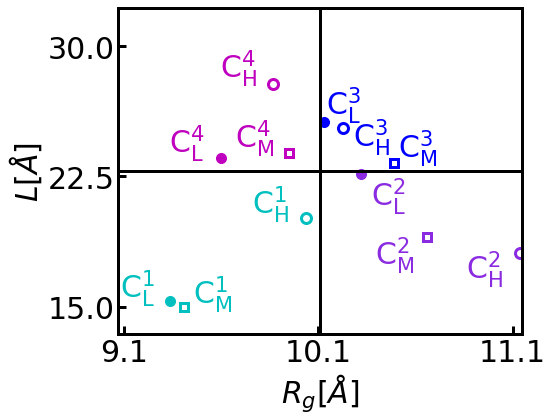

In [94]:
def targetConf(ConfList, dtprint=1, conf='LEC', tgtE=None):
    for k, (a,b,c,d,e,f,g) in enumerate(sysRgL.ConfHubList[i]):
        if b > 100*dtprint and b%dtprint == 0:
            crit=False
            if conf == 'LEC' and (tgtE == None or g < tgtE):
                crit=True                
            elif conf == 'HEC' and (tgtE == None or g > tgtE):
                crit=True
            elif conf == 'MEC' and (tgtE and g == tgtE):
                crit=True
            
            if tgtE == None or crit:
                tgtE = g
                idx = k
    
    print(conf+' of hub '+str(i+1)+' (traj, timestep, Rg, L, hub, contacts (i,i+l, l>=3), energy):')
    print(sysRgL.ConfHubList[i][idx])
    
    return idx

dtprint=1000 #step of recording conformations

fig, sbpl, fntsize = setfig.init(1, 1, hsize=6, wsize=8, left=0.2, d=2)
xmin = None
ymin = None
xmax = None
ymax = None

lframe = []
hframe = []
mframe = []

for i in range(sysRgL.nhubs): 
    color = colors[i]  
    
    idx = targetConf(sysRgL.ConfHubList[i], dtprint=dtprint, conf='LEC')
    lframe.append(idx)
    (traj, ts, Rg, L, hub, nc, tgtE) = sysRgL.ConfHubList[i][idx]
    sbpl.plot(Rg,L, 'o', markersize=10, color=color)
    
    label = r"C$_\mathrm{L}^{%d}$" % (i+1)
    if i == 0:
        xfac = 0.972
        yfac = 1.015
    elif i == 1:
        xfac = 1.005
        yfac = 0.92
    elif i == 2:
        xfac = 1.001
        yfac = 1.018
    elif i == 3:
        xfac = 0.972
        yfac = 1.015
    sbpl.text(Rg*xfac, L*yfac, label, fontsize=fntsize, color=color)
    
    (e1,e2) = hub
    if xmin == None or e1 < xmin:
        xmin = e1-1 #-1 fac for starting in 0
    if xmax == None or e1 > xmax:
        xmax = e1-1 #-1 fac for starting in 0
    if ymin == None or e2 < ymin:
        ymin = e2-1 #-1 fac for starting in 0
    if ymax == None or e2 > ymax:
        ymax = e2-1 #-1 fac for starting in 0
        
    idx = targetConf(sysRgL.ConfHubList[i], dtprint=dtprint, conf='HEC')
    hframe.append(idx)
    (traj, ts, Rg, L, hub, nc, tgtE) = sysRgL.ConfHubList[i][idx]
    sbpl.plot(Rg,L, 'o', markersize=10, color=color, fillstyle='none', markeredgewidth=3)

    label = r"C$_\mathrm{H}^{%d}$" % (i+1)
    if i == 1:
        xfac = 0.975
        yfac = 0.92
    elif i == 2:
        xfac = 1.005
        yfac = 0.96
    else:
        xfac = 0.972
        yfac = 1.015
    sbpl.text(Rg*xfac, L*yfac, label, fontsize=fntsize, color=color)
            
    idx = targetConf(sysRgL.ConfHubList[i], dtprint=dtprint, conf='MEC', tgtE=medE_list[i])
    mframe.append(idx)
    (traj, ts, Rg, L, hub, nc, tgtE) = sysRgL.ConfHubList[i][idx]
    sbpl.plot(Rg,L, 's', markersize=8, color=color, fillstyle='none', markeredgewidth=3)

    label = r"C$_\mathrm{M}^{%d}$" % (i+1)
    if i == 0:
        xfac = 1.005
        yfac = 1.015
    elif i == 1:
        xfac = 0.975
        yfac = 0.92        
    elif i == 2:
        xfac = 1.002
        yfac = 1.017
    elif i == 3:
        xfac = 0.972
        yfac = 1.015
    sbpl.text(Rg*xfac, L*yfac, label, fontsize=fntsize, color=color)

xbins = sysRgL.bins_x[xmin:xmax+2] #2 fac for adding another tick
ybins = sysRgL.bins_y[ymin:ymax+2] #2 fac for adding another tick

sbpl.plot(np.ones(2)*xbins[int(0.5*len(xbins))], np.linspace(ybins[0], ybins[-1], 2), 'k-', linewidth=3)
sbpl.plot(np.linspace(xbins[0], xbins[-1], 2), np.ones(2)*ybins[int(0.5*len(xbins))], 'k-', linewidth=3)
setfig.custom_subplot(sbpl, fontsize=fntsize, linewidth=3, ticklength=8,
                      xmin=xbins[0], xmax=xbins[-1]*1.0001,
                      ymin=ybins[0], ymax=ybins[-1]*1.0001,
                      xmin_tick=9.1, xmax_tick=11.2, xstep_tick = 1,
                      ymin_tick=15, ymax_tick=31, ystep_tick = 7.5,
                      xlabel=r'$R_g [\AA]$', ylabel=r'$L[\AA]$')

figname='Confs_dscrtzd_pln.eps'
fig.savefig(figname, dpi=600, fmt='eps')

The graph above show the position of each conformation in the discretized plane. The conformational differences between them can be better quantified by means of formed contacts. 
Contacts which distances are smaller than $1.3\sigma_{ij}$ are identified below, where $\sigma_{ij}$ is particular to each pair of residues i and j.

In [95]:
import re
import pandas as pd

path='/home/belisa/Documents/PUMA_ext/3.2-wocmap/'

### get rmin info from file ###

fname = path+'tp0.35/wyniki12.txt'
df_rmin = pd.read_csv(fname, header=-1, skiprows=30, sep='\s+', names=['Ri', 'Rj', 'r'])
#print(df_rmin)

frames = [lframe, hframe, mframe]
frmname = ['LEC', 'HEC', 'MEC']

cutoff = 1.3

for fi in range(len(frames)):
    frame = frames[fi]
    for i in range(sysRgL.nhubs):
        (traj, ts, Rg, L, hub, nc, E) = sysRgL.ConfHubList[i][frame[i]]

        ### select contact map from file ###

        if traj < 2:
            fname = 'puma_rd1'+'.map'
        elif traj%2:
            fname = 'puma_rd1p'+str(traj/2)+'.map'
        else:
            fname = 'puma_rd1p'+str(traj/2-1)+'.map'

        print('hub '+str(i+1)+', '+frmname[fi]+', cutoff '+str(cutoff)+', trajectory '+str(traj)+', timestep '+str(ts)+', file '+fname)

        fin = open(path+'tp0.35/'+fname)
        df_contacts = pd.DataFrame(data=re.findall(r'K\s+'+str(ts)+'.*', fin.read()))
        df_contacts = pd.DataFrame(data=df_contacts[0].str.split("\s+").to_list(), 
                          columns=['-', 'time', 'i', 'j', 'nr', 'type', 'Ri', 'Rj', 'r'])

        div_file = [k for k,x in enumerate(np.diff(df_contacts['i'].astype(int))) if x < 0][0]+1

        if traj%2:
            df_contacts = df_contacts[:div_file]
        else:
            df_contacts = df_contacts[div_file+1:]

        ncontacts = len(df_contacts)

        ### take only contacts with distances closer to rmin ###

        npairs = len(df_rmin)

        df_sel_contacts = pd.DataFrame()
        hlx_bondlist = []
        othr_bondlist = []

        hlx_bondlist.append('set sel [atomselect top all]')
        othr_bondlist.append('set sel [atomselect top all]')
        for k in range(ncontacts):
            for j in range(npairs):
                if df_contacts['Ri'].iloc[k] == df_rmin['Ri'].iloc[j] and df_contacts['Rj'].iloc[k] == df_rmin['Rj'].iloc[j]:
                    sigma = 0.5**(1./6.)*df_rmin['r'].iloc[j]
                    if float(df_contacts['r'].iloc[k]) < cutoff*sigma:
                        
                        df_sel_contacts = df_sel_contacts.append(df_contacts.iloc[[k]])

                        ### separate i,i+3,4 and i,i+l>=5 contacts ###

                        if int(df_contacts['j'].iloc[k]) <= int(df_contacts['i'].iloc[k]) + 4:
                            hlx_bondlist.append('label add Bonds [$sel molid]/'+str(int(df_contacts['i'].iloc[k])-1)+' [$sel molid]/'+str(int(df_contacts['j'].iloc[k])-1))
                        else:
                            othr_bondlist.append('label add Bonds [$sel molid]/'+str(int(df_contacts['i'].iloc[k])-1)+' [$sel molid]/'+str(int(df_contacts['j'].iloc[k])-1))
        hlx_bondlist.append('label textsize 0.0001')
        othr_bondlist.append('label textsize 0.0001')
        hlx_bondlist.append('label texthickness 0.0001')
        othr_bondlist.append('label texthickness 0.0001')

        ncontacts = len(df_sel_contacts)
        ncontacts_hlx = len(hlx_bondlist)-3
        ncontacts_othr = len(othr_bondlist)-3
        print('number of contacts (i,i+l>=3) obeying criteria '+str(cutoff)+'sigma: '+str(ncontacts))
        print('number of contacts (i,i+l=3,4) obeying criteria '+str(cutoff)+'sigma: '+str(ncontacts_hlx))
        print('number of contacts (i,i+l>=5) obeying criteria '+str(cutoff)+'sigma: '+str(ncontacts_othr))

        fname = path+'hub'+str(i+1)+'_e'+str(E)+'_traj'+str(traj)+'_ts'+str(ts)+'_cut'+str(cutoff)+'.map'
        print(fname)
        np.savetxt(fname, df_sel_contacts.values, fmt='%s')
        fname = path+'hub'+str(i+1)+'_e'+str(E)+'_traj'+str(traj)+'_ts'+str(ts)+'_i,i+3,4_cut'+str(cutoff)+'_bondlist.tcl'
        np.savetxt(fname, hlx_bondlist, fmt='%s')
        fname = path+'hub'+str(i+1)+'_e'+str(E)+'_traj'+str(traj)+'_ts'+str(ts)+'_i,i+l>=5_cut'+str(cutoff)+'_bondlist.tcl'
        np.savetxt(fname, othr_bondlist, fmt='%s')

hub 1, LEC, cutoff 1.3, trajectory 201, timestep 452000, file puma_rd1p100.map
number of contacts (i,i+l>=3) obeying criteria 1.3sigma: 32
number of contacts (i,i+l=3,4) obeying criteria 1.3sigma: 13
number of contacts (i,i+l>=5) obeying criteria 1.3sigma: 19
/home/belisa/Documents/PUMA_ext/3.2-wocmap/hub1_e-88.8_traj201_ts452000_cut1.3.map
hub 2, LEC, cutoff 1.3, trajectory 204, timestep 782000, file puma_rd1p101.map
number of contacts (i,i+l>=3) obeying criteria 1.3sigma: 34
number of contacts (i,i+l=3,4) obeying criteria 1.3sigma: 11
number of contacts (i,i+l>=5) obeying criteria 1.3sigma: 23
/home/belisa/Documents/PUMA_ext/3.2-wocmap/hub2_e-82.2615_traj204_ts782000_cut1.3.map
hub 3, LEC, cutoff 1.3, trajectory 65, timestep 290000, file puma_rd1p32.map
number of contacts (i,i+l>=3) obeying criteria 1.3sigma: 36
number of contacts (i,i+l=3,4) obeying criteria 1.3sigma: 14
number of contacts (i,i+l>=5) obeying criteria 1.3sigma: 22
/home/belisa/Documents/PUMA_ext/3.2-wocmap/hub3_e-82.

All $C_L^i$ and two $C_M^i$ and $C_H^i$ conformations are shown below, where the first (last) residue is shown in green (red). The contacts shown in the conformations have distances smaller than $1.3\sigma_{ij}$ and obey the criteria i,i+l, where either l=[3,4] (left) or l>=5 (right)

$C_\mathrm{L}^1$, l=[3,4] | $C_\mathrm{L}^1$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub1_e-88p8_traj201_ts452_i,i+3,4_cut1p3.gif)  |  ![alt text](hub1_e-88p8_traj201_ts452_i,i+l>=5_cut1p3.gif)

$C_\mathrm{L}^2$, l=[3,4] | $C_\mathrm{L}^2$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub2_e-82p2615_traj204_ts782_i,i+3,4_cut1p3.gif)  |  ![alt text](hub2_e-82p2615_traj204_ts782_i,i+l>=5_cut1p3.gif)

$C_\mathrm{L}^3$, l=[3,4] | $C_\mathrm{L}^3$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub3_e-82p881_traj65_ts290_i,i+3,4_cut1p3.gif)   |  ![alt text](hub3_e-82p881_traj65_ts290_i,i+l>=5_cut1p3.gif)

$C_\mathrm{L}^4$, l=[3,4] | $C_\mathrm{L}^4$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub4_e-85p236_traj201_ts423_i,i+3,4_cut1p3.gif)  |  ![alt text](hub4_e-85p236_traj201_ts423_i,i+l>=5_cut1p3.gif)

$C_\mathrm{M}^1$, l=[3,4] | $C_\mathrm{M}^1$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub1_e-61p4025_traj129_ts922_i,i+3,4_cut1p3.gif)  |  ![alt text](hub1_e-61p4025_traj129_ts922_i,i+l>=5_cut1p3.gif)

$C_\mathrm{M}^2$, l=[3,4] | $C_\mathrm{M}^2$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub2_e-58p095_traj210_ts316_i,i+3,4_cut1p3.gif)  |  ![alt text](hub2_e-58p095_traj210_ts316_i,i+l>=5_cut1p3.gif)

$C_\mathrm{H}^1$, l=[3,4] | $C_\mathrm{H}^1$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub1_e-29p712_traj47_ts554_i,i+3,4_cut1p3.gif)  |  ![alt text](hub1_e-29p712_traj47_ts554_i,i+l>=5_cut1p3.gif)

$C_\mathrm{H}^2$, l=[3,4] | $C_\mathrm{H}^2$, l>=5
:-------------------------:|:-------------------------:
![alt text](hub2_e-29p241_traj199_ts418_i,i+3,4_cut1p3.gif)  |  ![alt text](hub2_e-29p241_traj199_ts418_i,i+l>=5_cut1p3.gif)

The number of contacts with distances smaller than $1.3\sigma_{ij}$ for each conformation and criteria are below, together with the corresponding energy, $L$ and $R_g$ for each conformation.

| Conf. | Energy [kcal/mol] | $R_g$ [$\overset{\circ}{A}$] | L [$\overset{\circ}{A}$] | l=[3,4] | l>=5 | l>=3
| --- | --- | --- | --- | --- | --- | --- |
| $C_\mathrm{L}^1$ | -88.8 | 9.34 | 15.3 | 13 | 19 | 32 |
| $C_\mathrm{L}^2$ | -82.3 | 10.3 | 22.6 | 11 | 23 | 34 |
| $C_\mathrm{L}^3$ | -82.9 | 10.1 | 25.6 | 14 | 22 | 36 |
| $C_\mathrm{L}^4$ | -85.2 | 9.60 | 23.5 | 11 | 26 | 37 |
| $C_\mathrm{M}^1$ | -61.4 | 9.41 | 15.0 | 13 | 22 | 35 |
| $C_\mathrm{M}^2$ | -58.1 | 10.7 | 19.0 | 9 | 21 | 30 |
| $C_\mathrm{M}^3$ | -58.5 | 10.5 | 23.2 | 12 | 23 | 35 |
| $C_\mathrm{M}^4$ | -61.3 | 9.87 | 27.8 | 11 | 24 | 35 |
| $C_\mathrm{H}^1$ | -29.7 | 10.0 | 20.1 | 10 | 20 | 30 |
| $C_\mathrm{H}^2$ | -29.2 | 11.1 | 18.1 | 12 | 21 | 33 |
| $C_\mathrm{H}^3$ | -28.1 | 10.5 | 31.7 | 8 | 24 | 32 |
| $C_\mathrm{H}^4$ | -30.6 | 9.95 | 23.8 | 13 | 25 | 38 |